In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import seaborn as sns

In [199]:
csv_file_path ='C:/Users/princ/Downloads/M6_T2_V1_Diamonds.csv'

In [200]:
df = pd.read_csv(csv_file_path)

In [201]:
df.head()

,carat,cut,color,clarity,price,x,y,z
0,0.23,Ideal,E,SI2,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,335,4.34,4.35,2.75


In [202]:
print(df)

       carat        cut color clarity  price     x     y     z
0       0.23      Ideal     E     SI2    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1    326  3.89  3.84  2.31
2       0.23       Good     E     VS1    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2    334  4.20  4.23  2.63
4       0.31       Good     J     SI2    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   2757  5.83  5.87  3.64

[53940 rows x 8 columns]


In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   price    53940 non-null  int64  
 5   x        53940 non-null  float64
 6   y        53940 non-null  float64
 7   z        53940 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


In [204]:
df.describe()

,carat,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,3932.799722,5.731157,5.734526,3.538734
std,0.474011,3989.439738,1.121761,1.142135,0.705699
min,0.200000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,18823.000000,10.740000,58.900000,31.800000


In [205]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
price      0
x          0
y          0
z          0
dtype: int64

In [206]:
print(df.isnull())

       carat    cut  color  clarity  price      x      y      z
0      False  False  False    False  False  False  False  False
1      False  False  False    False  False  False  False  False
2      False  False  False    False  False  False  False  False
3      False  False  False    False  False  False  False  False
4      False  False  False    False  False  False  False  False
...      ...    ...    ...      ...    ...    ...    ...    ...
53935  False  False  False    False  False  False  False  False
53936  False  False  False    False  False  False  False  False
53937  False  False  False    False  False  False  False  False
53938  False  False  False    False  False  False  False  False
53939  False  False  False    False  False  False  False  False

[53940 rows x 8 columns]


In [207]:
df.shape

(53940, 8)

In [208]:
# Create the model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

LinearRegression()

In [209]:
# Get the coefficients (slope and intercept)
slope = model.coef_[0]
intercept = model.intercept_

print(f"Linear regression equation: price = {intercept:.2f} + {slope:.2f} * carat")

Linear regression equation: price = -2256.36 + 7756.43 * carat


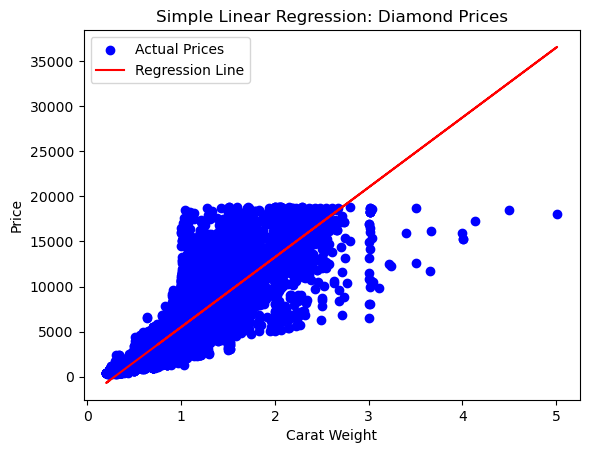

In [210]:
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Carat Weight')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Diamond Prices')
plt.legend()
plt.show()

In [211]:
# Create polynomial features (e.g., up to degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a polynomial regression model
poly_model = LinearRegression()
poly_model.fit(X_poly, y)

# Print the polynomial equation
print(f"Polynomial regression equation: price = {poly_model.intercept_:.2f} + {poly_model.coef_[1]:.2f} * carat + {poly_model.coef_[2]:.2f} * carat^2")

Polynomial regression equation: price = -1832.58 + 6677.03 * carat + 507.91 * carat^2


In [212]:
num_cols =df.select_dtypes(include =['number'])

print(num_cols)
num_cols.corr()

       carat  price     x     y     z
0       0.23    326  3.95  3.98  2.43
1       0.21    326  3.89  3.84  2.31
2       0.23    327  4.05  4.07  2.31
3       0.29    334  4.20  4.23  2.63
4       0.31    335  4.34  4.35  2.75
...      ...    ...   ...   ...   ...
53935   0.72   2757  5.75  5.76  3.50
53936   0.72   2757  5.69  5.75  3.61
53937   0.70   2757  5.66  5.68  3.56
53938   0.86   2757  6.15  6.12  3.74
53939   0.75   2757  5.83  5.87  3.64

[53940 rows x 5 columns]


,carat,price,x,y,z
carat,1.000000,0.921591,0.975094,0.951722,0.953387
price,0.921591,1.000000,0.884435,0.865421,0.861249
x,0.975094,0.884435,1.000000,0.974701,0.970772
y,0.951722,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.861249,0.970772,0.952006,1.000000


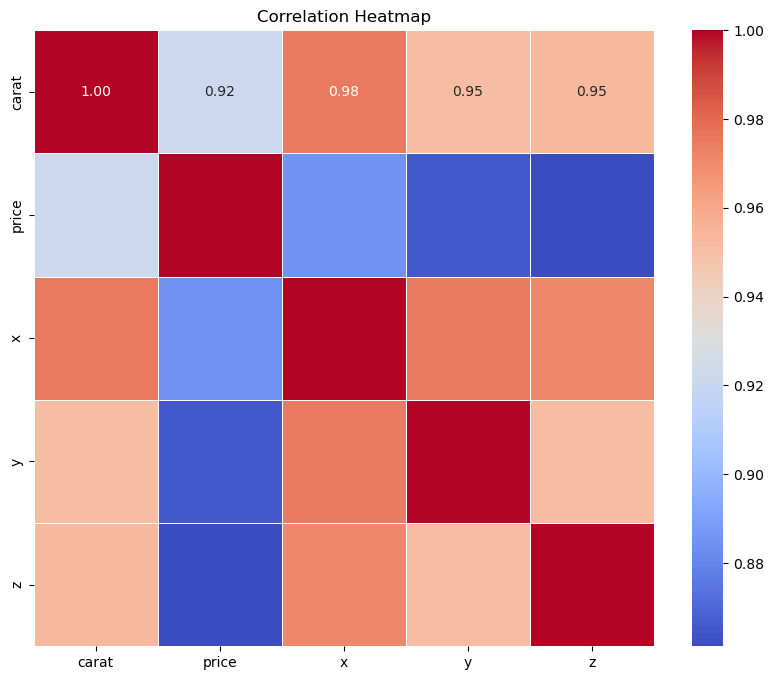

In [232]:
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlations = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [214]:
X = df[['carat']].values
X

array([[0.23],
       [0.21],
       [0.23],
       ...,
       [0.7 ],
       [0.86],
       [0.75]])

In [215]:
y = df['price'].values
y

array([ 326,  326,  327, ..., 2757, 2757, 2757], dtype=int64)

In [216]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Simple linear regression
simple_model = LinearRegression()
simple_model.fit(X_train, y_train)

LinearRegression()

In [217]:
# Assuming you've already trained your simple_model
y_pred_simple_fit = simple_model.predict(X_test)

In [218]:
y_pred_simple_fit

array([6271.32218313, 7742.92093379, 7045.84784137, ..., 6116.41705148,
       5651.70165653, 1624.16823367])

In [219]:
print(f"Test R2: {r2_score(y_test, y_pred_simple_fit)}")

Test R2: 0.8515758113126248


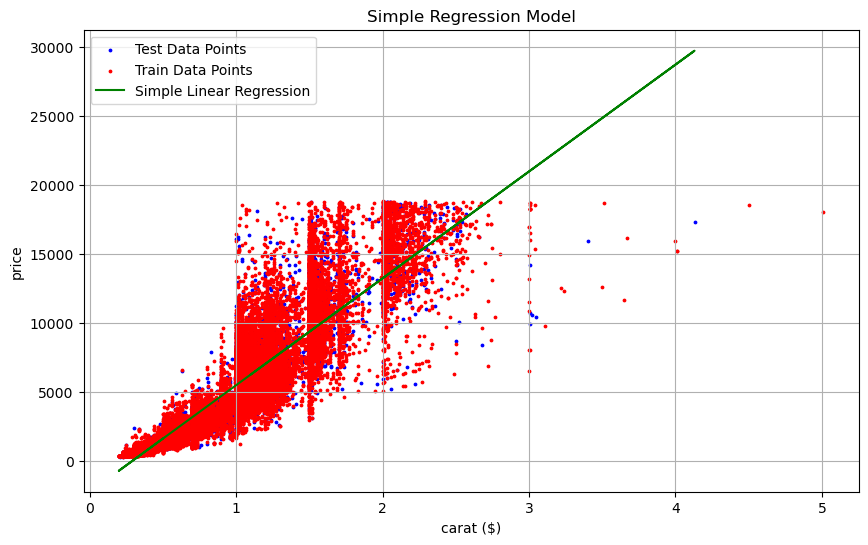

In [220]:
# Plotting
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(X_test, y_test, color='blue', label='Test Data Points',s=3)
plt.scatter(X_train, y_train, color='red', label='Train Data Points',s=3)


# Simple linear regression line
plt.plot(X_test, y_pred_simple_fit, color='green', label='Simple Linear Regression')


plt.title('Simple Regression Model')
plt.xlabel('carat ($)')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()

In [221]:
# Polynomial regression
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)
X_poly

array([[1.    , 0.23  , 0.0529],
       [1.    , 0.21  , 0.0441],
       [1.    , 0.23  , 0.0529],
       ...,
       [1.    , 0.7   , 0.49  ],
       [1.    , 0.86  , 0.7396],
       [1.    , 0.75  , 0.5625]])

In [222]:
y_pred_poly_fit = poly_model.predict(X_test_poly)
y_pred_poly_fit

array([6126.727758  , 7626.00636767, 6911.25054368, ..., 5971.04219271,
       5506.42348051, 1632.9146162 ])

In [223]:
print(f"Test R2: {r2_score(y_test, y_pred_poly_fit)}")

Test R2: 0.8540007824940403


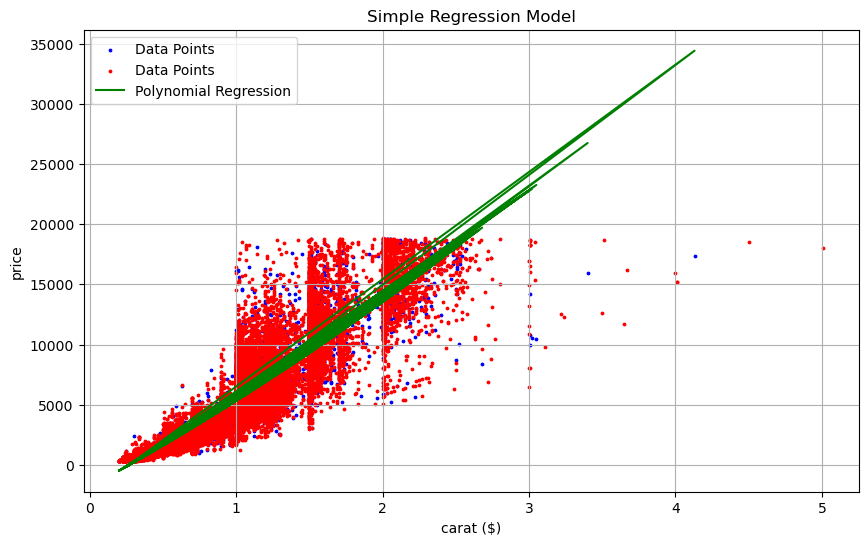

In [224]:
# Plotting
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(X_test, y_test, color='blue', label='Data Points',s=3)
plt.scatter(X_train, y_train, color='red', label='Data Points',s=3)


# Simple linear regression line
plt.plot(X_test, y_pred_poly_fit, color='green', label='Polynomial Regression')

plt.title('Simple Regression Model')
plt.xlabel('carat ($)')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()


In [225]:
X_fit = np.linspace(df['carat'].min(), df['carat'].max(), 10)
X_fit

array([0.2       , 0.73444444, 1.26888889, 1.80333333, 2.33777778,
       2.87222222, 3.40666667, 3.94111111, 4.47555556, 5.01      ])

In [226]:
X_fit_poly = poly_features.transform(X_fit[:, np.newaxis])
X_fit_poly

array([[ 1.        ,  0.2       ,  0.04      ],
       [ 1.        ,  0.73444444,  0.53940864],
       [ 1.        ,  1.26888889,  1.61007901],
       [ 1.        ,  1.80333333,  3.25201111],
       [ 1.        ,  2.33777778,  5.46520494],
       [ 1.        ,  2.87222222,  8.24966049],
       [ 1.        ,  3.40666667, 11.60537778],
       [ 1.        ,  3.94111111, 15.53235679],
       [ 1.        ,  4.47555556, 20.03059753],
       [ 1.        ,  5.01      , 25.1001    ]])

In [227]:
Y_fit_poly = poly_model.predict(X_fit_poly)
Y_fit_poly

array([ -476.85537252,  3345.30107086,  7457.60892522, 11860.06819054,
       16552.67886684, 21535.44095411, 26808.35445235, 32371.41936157,
       38224.63568175, 44368.0034129 ])

In [228]:
df_poly_fit = pd.DataFrame({'carat': X_fit, 'price': Y_fit_poly})
df_poly_fit

,carat,price
0,0.200000,-476.855373
1,0.734444,3345.301071
2,1.268889,7457.608925
3,1.803333,11860.068191
4,2.337778,16552.678867
5,2.872222,21535.440954
6,3.406667,26808.354452
7,3.941111,32371.419362
8,4.475556,38224.635682
9,5.010000,44368.003413


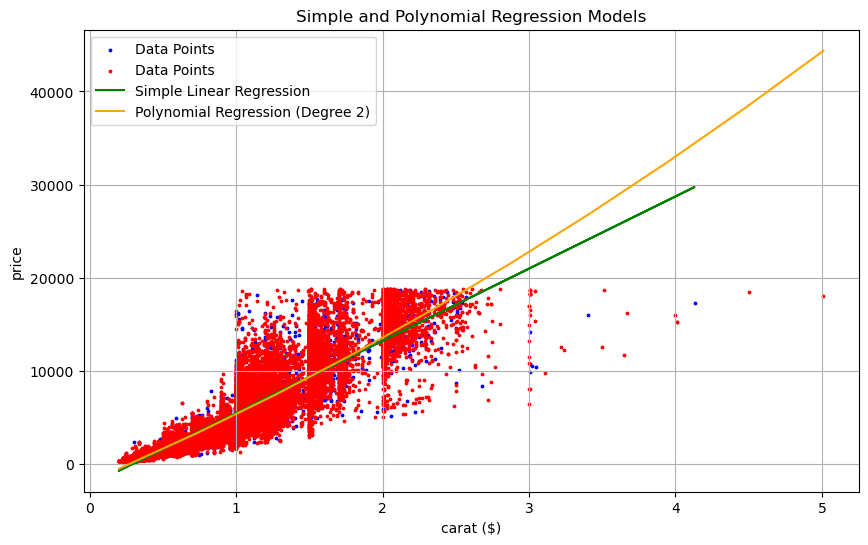

In [229]:
# Plotting
plt.figure(figsize=(10, 6))

# Original data points
plt.scatter(X_test, y_test, color='blue', label='Data Points',s=3)
plt.scatter(X_train, y_train, color='red', label='Data Points',s=3)

# Simple linear regression line
plt.plot(X_test, y_pred_simple_fit, color='green', label='Simple Linear Regression')

# Polynomial regression curve
plt.plot(df_poly_fit['carat'], df_poly_fit['price'], color='orange', label=f'Polynomial Regression (Degree {degree})')

plt.title('Simple and Polynomial Regression Models')
plt.xlabel('carat ($)')
plt.ylabel('price')
plt.legend()
plt.grid(True)
plt.show()

In [230]:
print("Coefficients:", model.coef_)

Coefficients: [7756.42561797]
